In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sn
import pickle

import warnings
warnings.filterwarnings('ignore')

In [30]:
df1 = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv",encoding='latin')

In [31]:
df2 = pd.read_excel(r'C:/Users/nikhi/OneDrive/Desktop/Country-Code.xlsx')

In [32]:
data = pd.merge (df1,df2) 

In [5]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [8]:
data.describe(include = object)

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text,Country
count,9551,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551,9551
unique,7446,141,8918,1208,1265,1825,12,2,2,2,1,6,6,15
top,Cafe Coffee Day,New Delhi,"Sector 41, Noida",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average,India
freq,83,5473,11,122,122,936,8652,8393,7100,9517,9551,3737,3737,8652


In [15]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [33]:
data = data.drop(['Restaurant ID','Country Code','Restaurant Name','City','Address','Locality','Locality Verbose',
                 'Longitude','Latitude'], axis = 1)

In [34]:
data.head()

,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [35]:
data.columns

Index(['Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [36]:
data1 = data.rename({'Average Cost for two':'Average_Cost_for_two','Has Table booking':'Has_Table_booking',
                     'Has Online delivery':'Has_Online_delivery','Is delivering now':'Is_delivering_now',
                     'Switch to order menu':'Switch_to_order_menu','Price range':'Price_range',
                     'Aggregate rating':'Aggregate_rating','Rating color':'Rating_color',
                     'Rating text':'Rating_text'},axis =1)

In [38]:
le = LabelEncoder()

In [39]:
for i in list(data1.columns):
    if (data1[i]).dtype == object:
        data1[i] = le.fit_transform(data1[i])

In [40]:
data1.head()

,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,920,1100,0,1,0,0,0,3,4.8,0,1,314,6
1,1111,1200,0,1,0,0,0,3,4.5,0,1,591,6
2,1671,4000,0,1,0,0,0,4,4.4,1,5,270,6
3,1126,1500,0,0,0,0,0,4,4.9,0,1,365,6
4,1122,1500,0,1,0,0,0,4,4.8,0,1,229,6


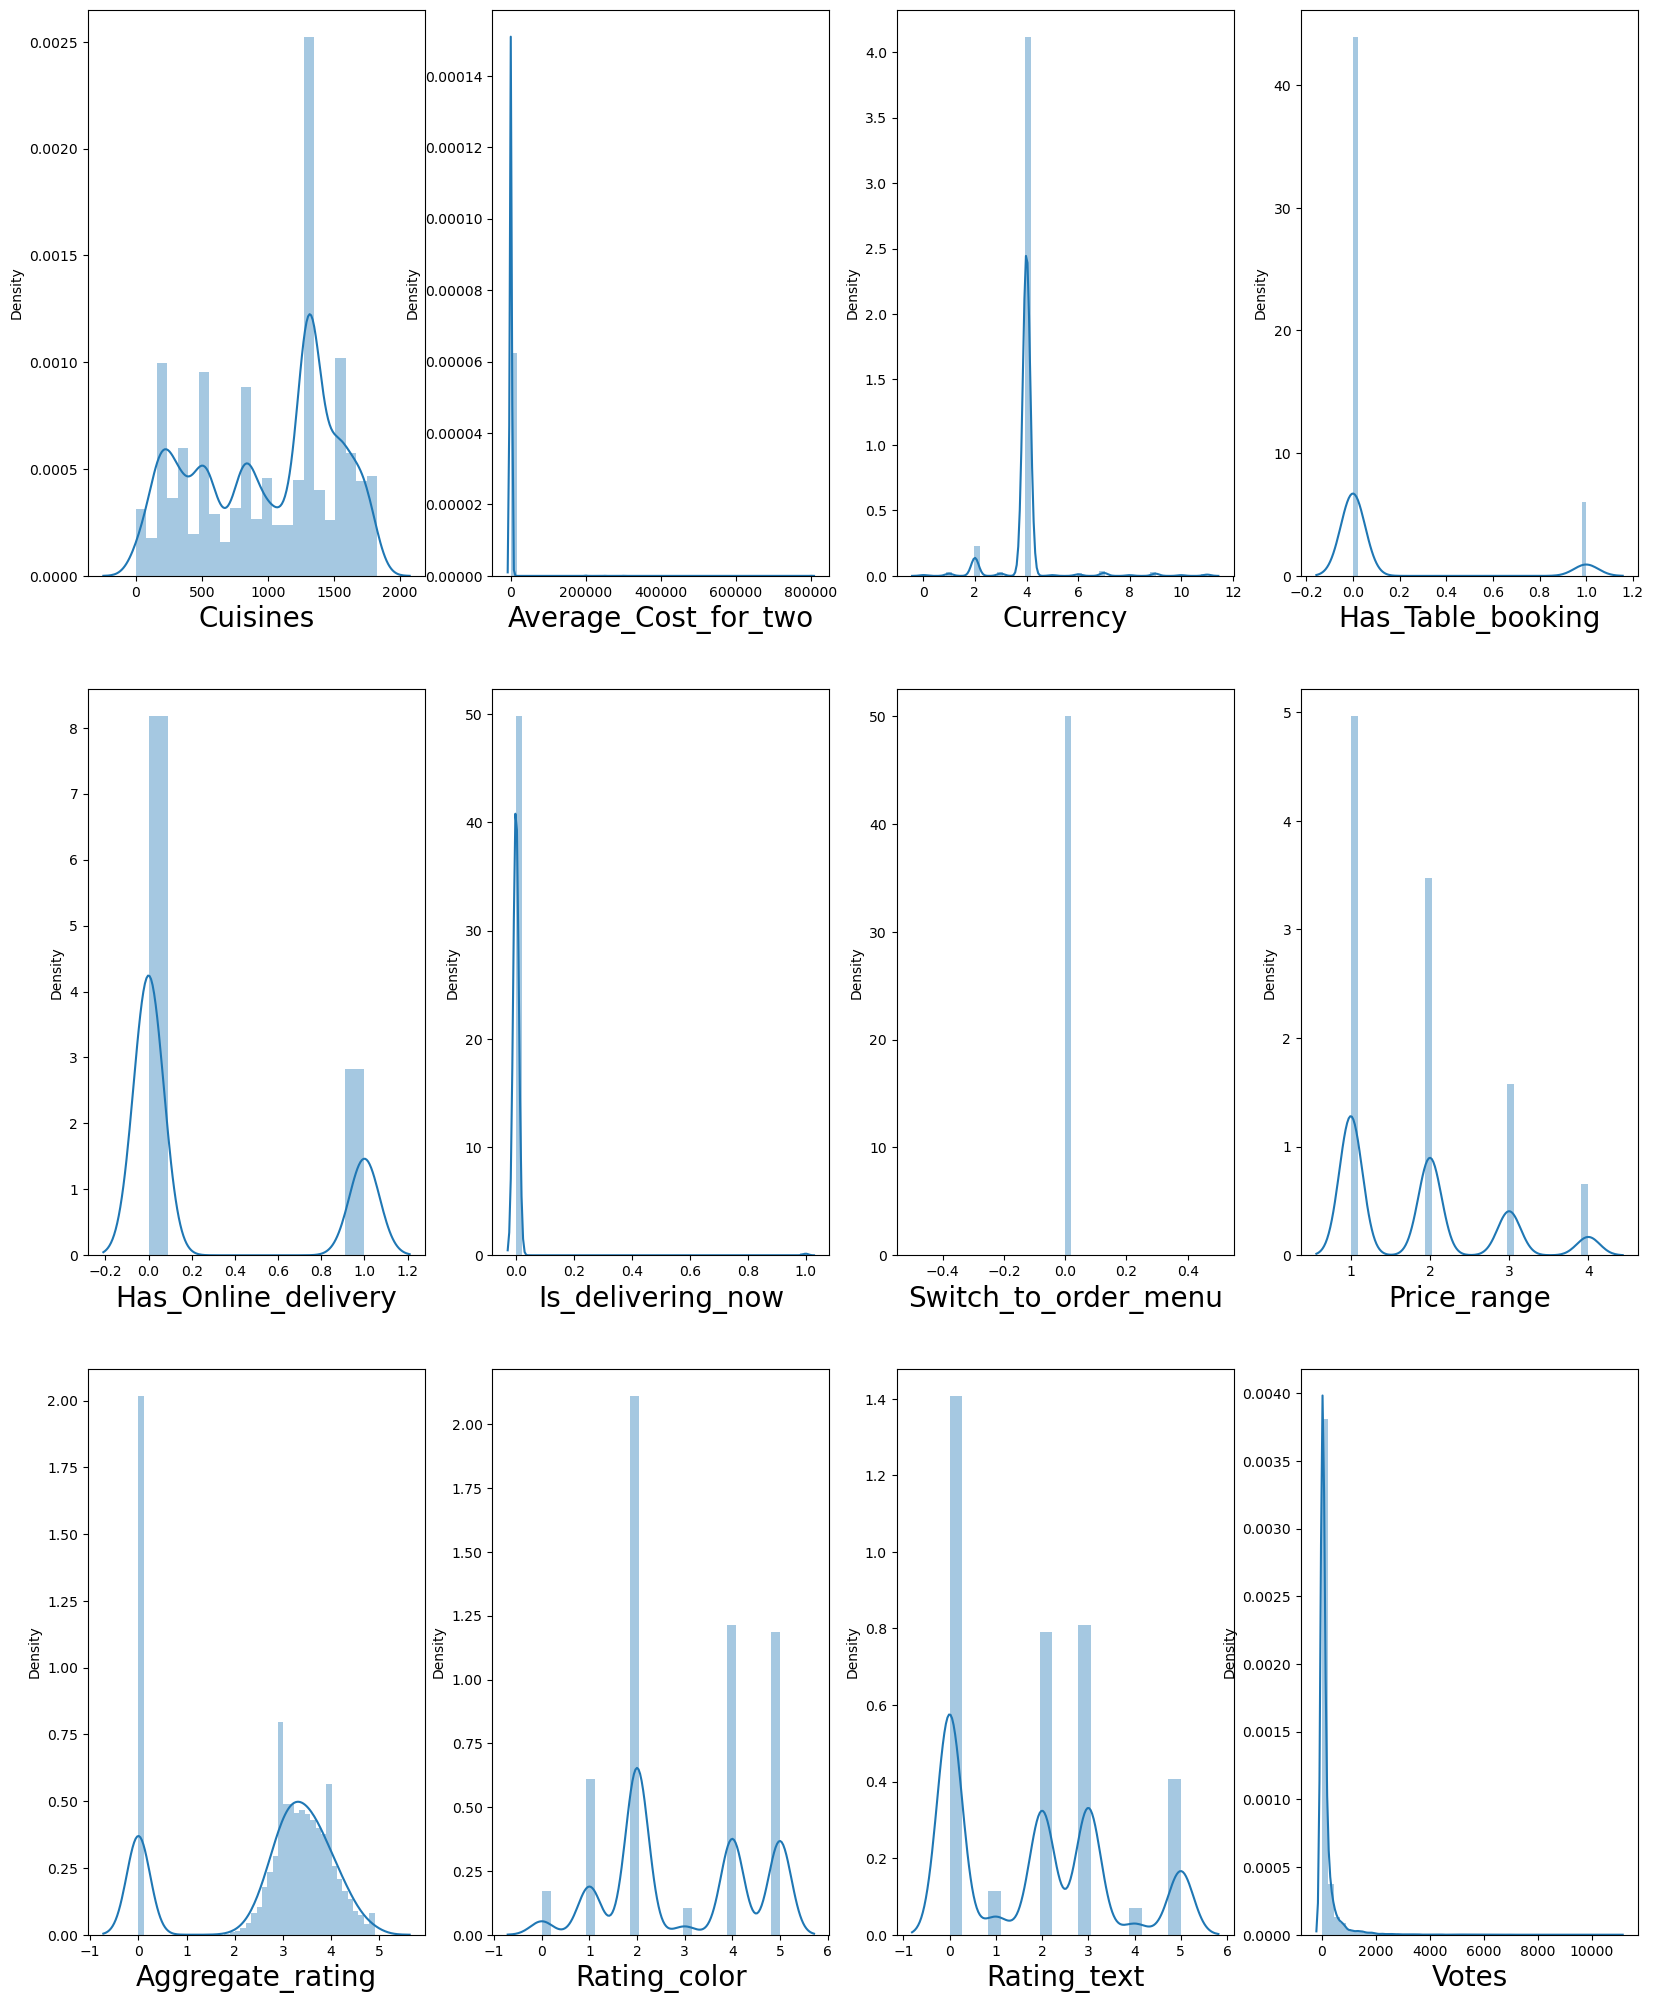

In [41]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in data1:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sn.distplot(data1[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.show()

In [42]:
data1.Average_Cost_for_two.unique()

array([  1100,   1200,   4000,   1500,   1000,   2000,   6000,    800,
          900,    700,    850,    600,   3000,   1800,     55,     30,
           45,     60,     50,     80,     90,    200,    150,    100,
          230,    240,    350,    140,    170,    120,    250,     40,
           70,    300,     85,     75,    400,     65,     25,     10,
            0,     35,     20,      7,    270,    500,    430,    315,
          220,     95,    190,    260,    180,    330,    280,    160,
          285,    130,    110,   2500,   3600,    550,   1400,    450,
          950,    650,   1300,   2400,   1600,   2200,    750,   1700,
         1250,   1900,   2700,   3500,   5000,   2300,   1750,   3200,
         2100,   1850,   4500,   3300,   1350,   1650,   1950,   1050,
          290,   1450,   2800,   3650,   4800,   1550,    720,   6500,
         7000,   1150,   2900,   2600,   4700,   3700,   3800,   4100,
         4300,   2650,   5100,   5500,   4400,   4200,   8000,   2350,
      

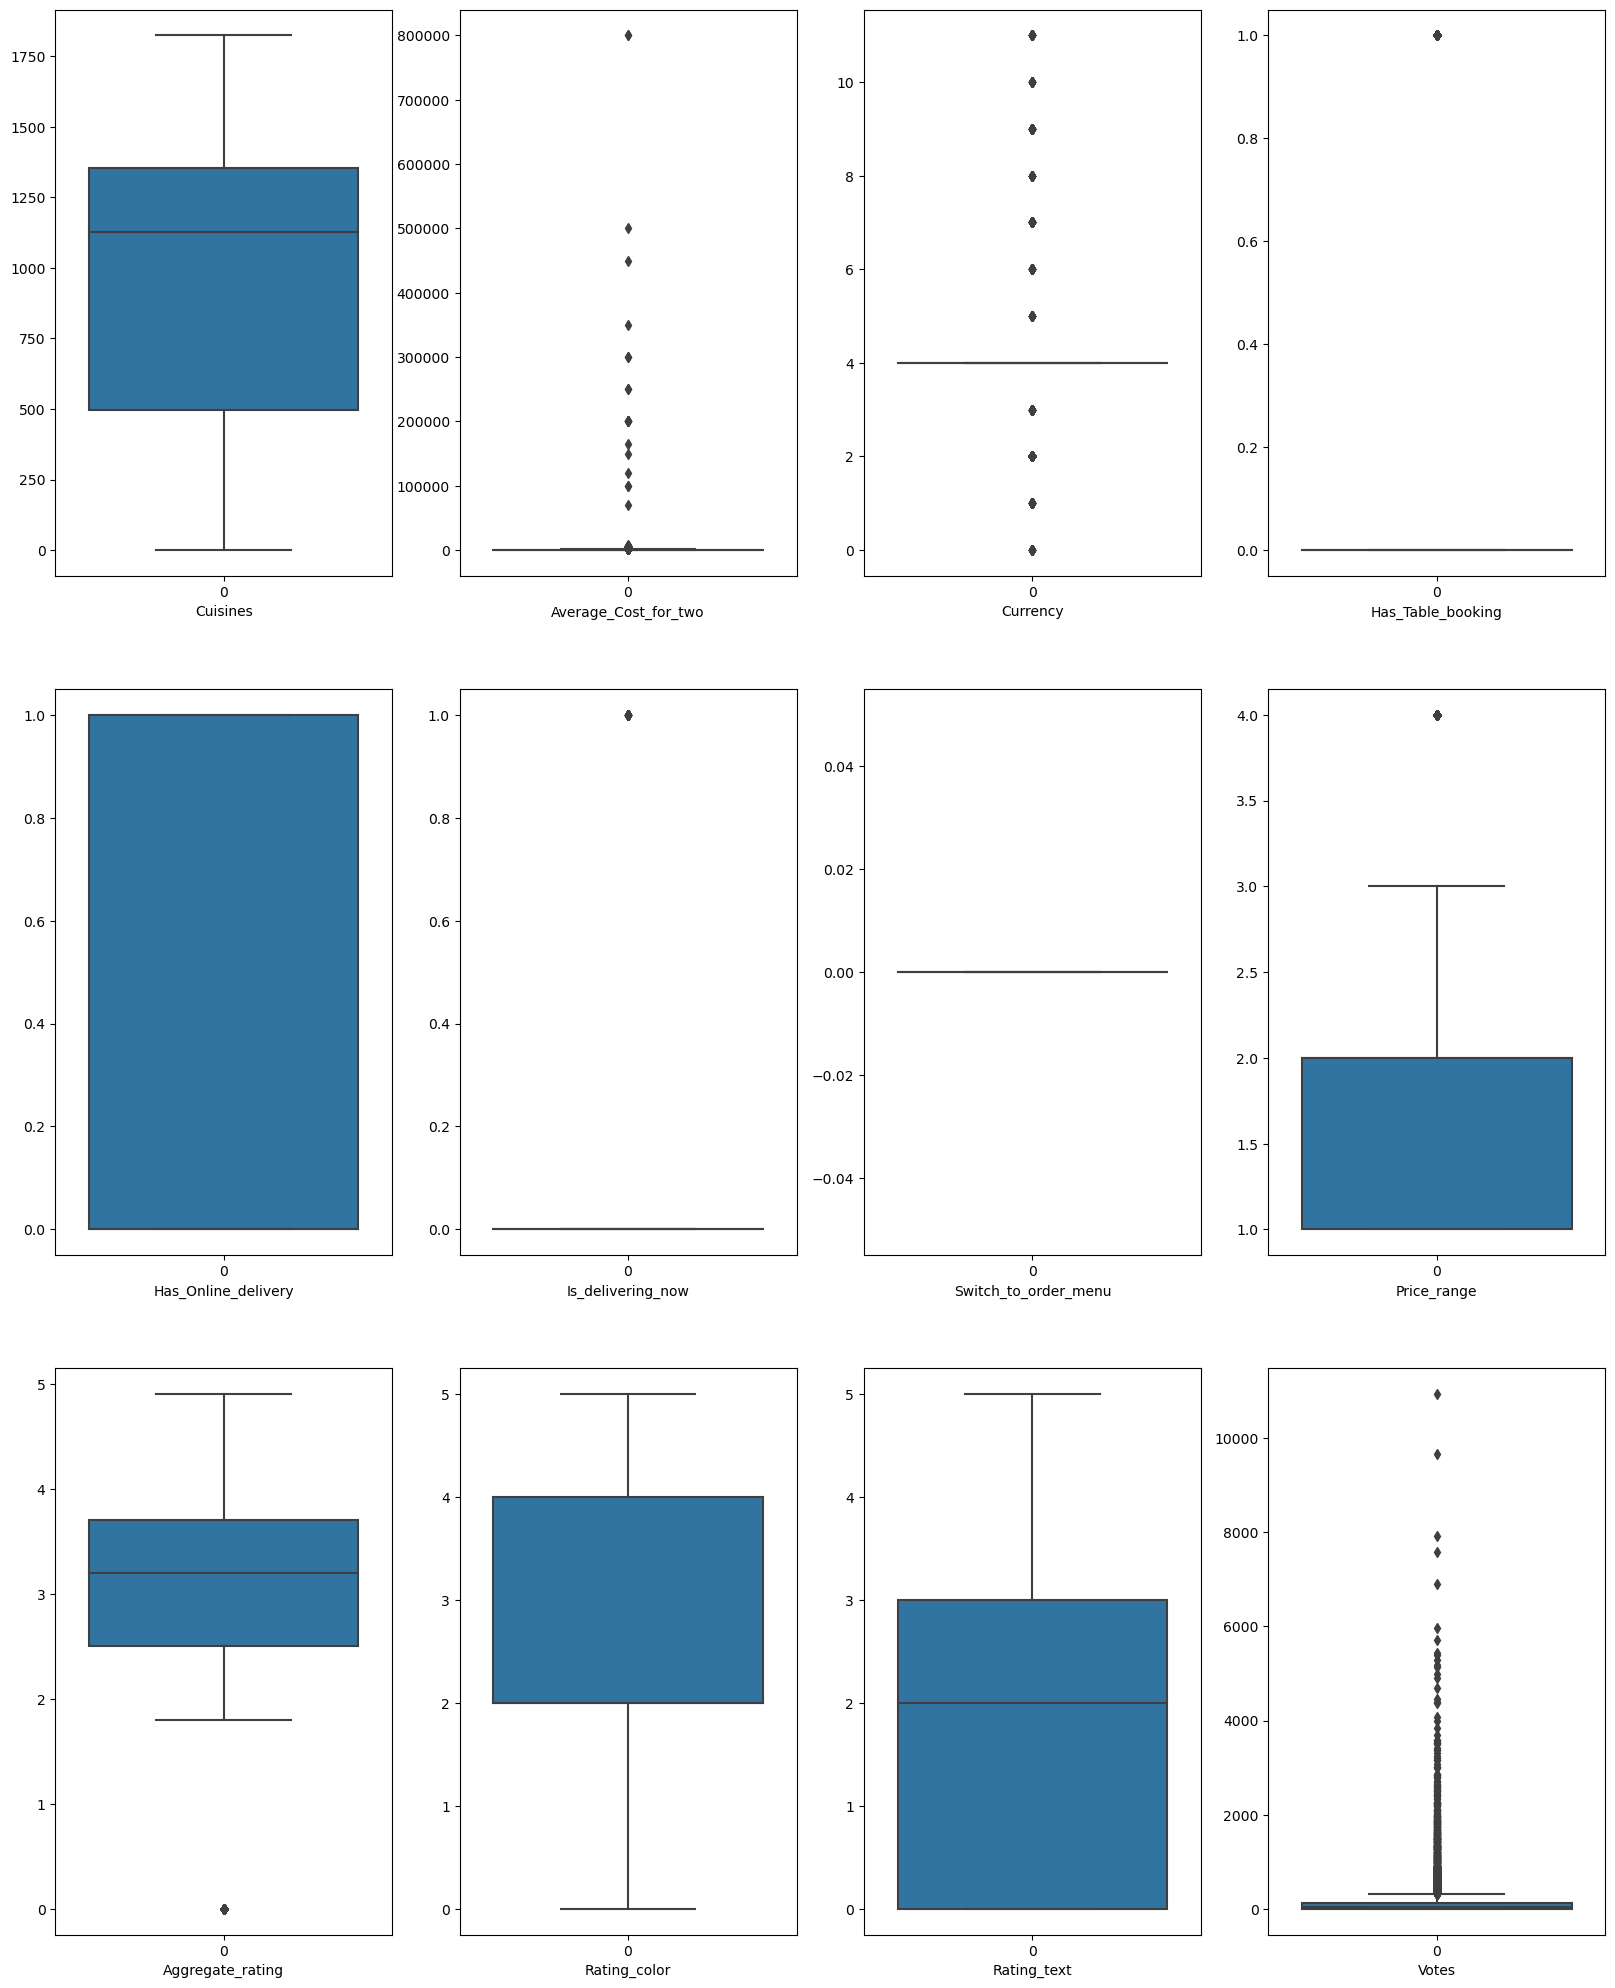

In [43]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in data1:
    if plotnumber <=12 :
        ax = plt.subplot(3,4,plotnumber)
        sn.boxplot(data = data1[column])
        plt.xlabel(column,fontsize = 10)
        
    plotnumber +=1
plt.show()

In [45]:
x = data1.drop('Price_range',axis = 1)
y = data1['Price_range']

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [47]:
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_predict = clf.predict(x_train)
        print('\n ---------- Train Result ----------')
        print(f'Accuracy Score : {accuracy_score(y_train,y_predict)  * 100:.2f}%')
        
        
    elif train == False:
        predict = clf.predict(x_test)
        print('\n ---------- Test Result ----------')
        print(f'Accuracy Score : {accuracy_score(y_test,predict)  * 100:.2f}%')
        
        print('\n \n Test Classification Report \n', classification_report(y_test,predict,digits = 2))

In [48]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)


 ---------- Train Result ----------
Accuracy Score : 100.00%

 ---------- Test Result ----------
Accuracy Score : 96.19%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99      1111
           2       0.96      0.96      0.96       785
           3       0.91      0.91      0.91       356
           4       0.92      0.90      0.91       136

    accuracy                           0.96      2388
   macro avg       0.94      0.94      0.94      2388
weighted avg       0.96      0.96      0.96      2388



In [50]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [51]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)


 ---------- Train Result ----------
Accuracy Score : 72.15%

 ---------- Test Result ----------
Accuracy Score : 72.15%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.81      0.88      0.84      1111
           2       0.66      0.78      0.71       785
           3       0.53      0.37      0.44       356
           4       0.00      0.00      0.00       136

    accuracy                           0.72      2388
   macro avg       0.50      0.51      0.50      2388
weighted avg       0.67      0.72      0.69      2388



In [52]:
clf = KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [53]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)


 ---------- Train Result ----------
Accuracy Score : 92.92%

 ---------- Test Result ----------
Accuracy Score : 90.83%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.95      0.96      0.95      1111
           2       0.89      0.92      0.91       785
           3       0.83      0.79      0.81       356
           4       0.91      0.65      0.76       136

    accuracy                           0.91      2388
   macro avg       0.89      0.83      0.86      2388
weighted avg       0.91      0.91      0.91      2388

